In [1]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
original_penguins_data = pd.read_csv('raw_data/penguins.csv')
original_penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
#Group the data by sex and calculate the average body mass
body_mass_by_sex = original_penguins_data.groupby('sex')['body_mass_g'].mean()

# Display the result as a table
print(body_mass_by_sex)


sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64


In [3]:
print(original_penguins_data.columns)
print(original_penguins_data.shape)
print(original_penguins_data.dtypes)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
(344, 7)
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [4]:
#original_penguins_data['species'].unique()
original_penguins_data['sex'].unique()

nan_count = original_penguins_data.isna().sum()
nan_count


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
nan_values = original_penguins_data[original_penguins_data.isna().any(axis=1)]
nan_values

# index 3 (row 3)
# index 339 (row 339)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [6]:
null_values_zero_df = original_penguins_data.copy()
null_values_zero_df['bill_depth_mm'] = null_values_zero_df[['bill_depth_mm']].fillna(0)
null_values_zero_df['bill_length_mm'] = null_values_zero_df[['bill_length_mm']].fillna(0)
null_values_zero_df['bill_depth_mm'] = null_values_zero_df[['bill_depth_mm']].fillna(0)
null_values_zero_df['flipper_length_mm'] = null_values_zero_df[['flipper_length_mm']].fillna(0)
null_values_zero_df['body_mass_g'] = null_values_zero_df[['body_mass_g']].fillna(0)
null_values_zero_df['sex'] = null_values_zero_df[['sex']].fillna('UNK')

null_values_zero_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,UNK
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.0,0.0,0.0,0.0,UNK
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
null_values_average_df = original_penguins_data.copy()

null_values_average_df['bill_length_mm'] = null_values_average_df[['bill_length_mm']].fillna(null_values_average_df[['bill_length_mm']].mean())
null_values_average_df['bill_depth_mm'] = null_values_average_df[['bill_depth_mm']].fillna(null_values_average_df[['bill_depth_mm']].mean())
null_values_average_df['flipper_length_mm'] = null_values_average_df[['flipper_length_mm']].fillna(null_values_average_df[['flipper_length_mm']].mean())
null_values_average_df['body_mass_g'] = null_values_average_df[['body_mass_g']].fillna(null_values_average_df[['body_mass_g']].mean())
null_values_average_df['sex'] = null_values_average_df[['sex']].fillna('UNK')

null_values_average_df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
penguins_df = null_values_average_df.copy()

gentoo_df = penguins_df[penguins_df['species'] == 'Gentoo']
gentoo_df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.10000,13.20000,211.000000,4500.000000,FEMALE
221,Gentoo,Biscoe,50.00000,16.30000,230.000000,5700.000000,MALE
222,Gentoo,Biscoe,48.70000,14.10000,210.000000,4450.000000,FEMALE
223,Gentoo,Biscoe,50.00000,15.20000,218.000000,5700.000000,MALE
224,Gentoo,Biscoe,47.60000,14.50000,215.000000,5400.000000,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,UNK
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [17]:
species_flipper_average = original_penguins_data.groupby('species')['flipper_length_mm'].mean().reset_index().round(0)

species_flipper_average


,species,flipper_length_mm
0,Adelie,190.0
1,Chinstrap,196.0
2,Gentoo,217.0


<BarContainer object of 3 artists>

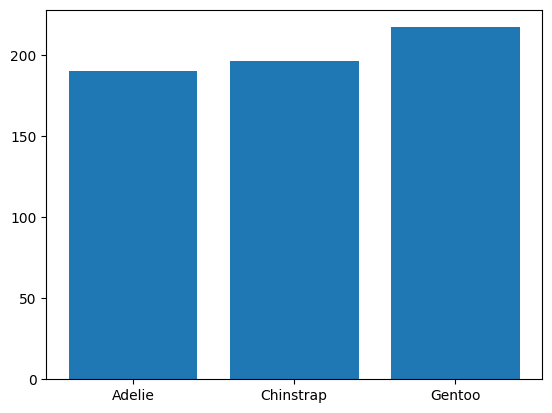

In [34]:
plt.bar(species_flipper_average['species'], species_flipper_average['flipper_length_mm'])

In [ ]:
#   beefy_gentoo_df = gentoo_df.query("body_mass_g > 5000")
#   beefy_gentoo_df
male_gentoo = gentoo_df.query("sex == 'MALE'")
female_gentoo = gentoo_df.query("sex == 'FEMALE'")

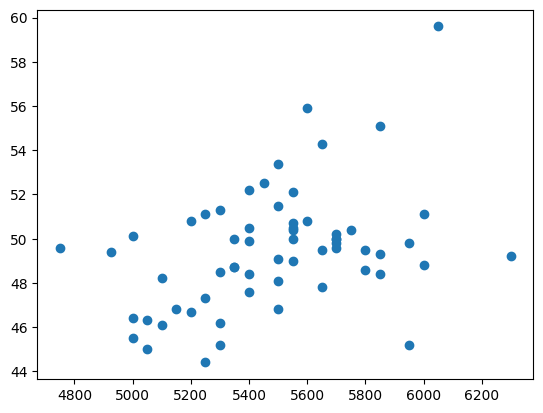

In [26]:
plt.scatter(male_gentoo['body_mass_g'],male_gentoo['bill_length_mm'])

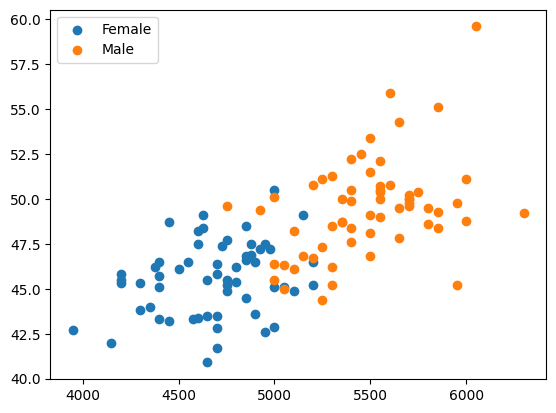

In [38]:
plt.scatter(female_gentoo['body_mass_g'],female_gentoo['bill_length_mm'],label='Female')
plt.scatter(male_gentoo['body_mass_g'],male_gentoo['bill_length_mm'],label='Male')
plt.legend()

IndentationError: unexpected indent (3729732057.py, line 1)